<a href="https://colab.research.google.com/github/uol-mediaprocessing/group-projects-make-it-aesthetic/blob/master/MakeItAesthetic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Make it Aesthetic

# Table of Content
 1 Introduction
 
 2 Goals and Use Cases
  
 2.1 Our Goals

 2.2 Use Cases

 3 Theory and Methods
 
 4 Process
 
 5 Literature

# 1 Introduction

Photos are taken for various reasons.

Someone wants to document some situations, others want to keep their experience in memory. And someone takes photos because of art reasons. 

Almost everybody makes photos but not every photograph fulfills the criteria of an aesthetic photo. To change this we aim to be able to make every photo aesthetic. To reach this goal it is necessary to define the rules of an aesthetic photo and to define which object is the main object of the photo. These goals are described in the following chapter.



# 2 Goals and Use Cases
## 2.1 Goals
* make given images aesthetic

* selecting the guideline the image should follow

* Rule of Thirds

* Diagonal Dominance

* Visual Balance

* Golden Ratio

* by zooming and rotation the image

## 2.2 Use Cases
* making photos more aethstic for an photo album or for a website
  * vacation
    * sightseeing photos of buildings
    * nature photos of landscapes and detailed plants
  * wedding and over big events photos of people
  * art photos of detailed motives
* let the algorithms editing all your photos instead of doing it manually

# 3 Theory and Methods

![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQAJ7LcNQXUT0an5uu2FO_uclWl8MCq0wINJNh3oLrs-shr3_Hb5A)


Golden Ratio

![alt text](https://s14-eu5.startpage.com/cgi-bin/serveimage?url=https%3A%2F%2Fencrypted-tbn0.gstatic.com%2Fimages%3Fq%3Dtbn%3AANd9GcQDsh2JSGxEuiQueDxc8Nv3exWChiSh6WRxRrh_LeffSCXFbiysFA&sp=008dda95fde15b3ee8aea0de9351ca23&anticache=923965)


Diagonal Dominance

![alt text](https://ianfrithrn.files.wordpress.com/2012/05/reduced1.jpg)

#4 Process

In [0]:
import numpy as np
import cv2
from skimage import io
from matplotlib import pyplot as plt

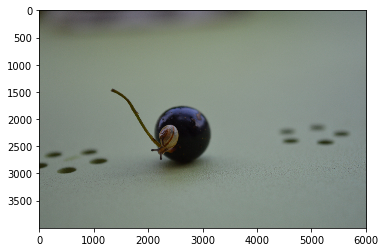

In [0]:
! wget -q https://raw.githubusercontent.com/.../snail.JPG
img_snail = cv2.imread("snail.JPG")
img_snail = cv2.cvtColor(img_snail, cv2.COLOR_BGR2RGB)
plt.imshow(img_snail)

I want to apply the same algorithm for practise. 

In [0]:
img_snail.shape

(4000, 6016, 3)

If we save the x and y value of the picture in a variable, we can use the same algorithm for each picture, with any size. We also aren't limitated on square pictures.

In [0]:
y_value = img_snail.shape[0]
print(y_value)

4000


In [0]:
x_value = img_snail.shape[1]
print(x_value)

6016


In [0]:
third_of_height = y_value // 3
print(third_of_height)

1333


In [0]:
third_of_height_2 = third_of_height * 2 #for the second line
print(third_of_height_2)

2666


In [0]:
third_of_width = x_value // 3
print(third_of_width)

2005


In [0]:
third_of_width_2 = third_of_width * 2 #for the second line
print(third_of_width_2)

4010


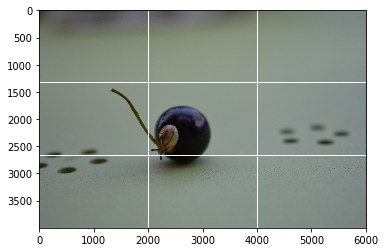

In [0]:
img_snail = cv2.imread("snail.JPG")
img_snail = cv2.cvtColor(img_snail, cv2.COLOR_BGR2RGB)
line_width = 5 # thickness of line has to be greater than 1 because 1 is invisible in some edge cases
black = (0,0,0)
line_color = (255,255,255)
cv2.line(img_snail, (0, third_of_height), (x_value, third_of_height), line_color,line_width)
cv2.line(img_snail, (third_of_width, 0), (third_of_width, y_value), line_color,line_width)
cv2.line(img_snail, (0, third_of_height_2), (x_value, third_of_height_2), line_color,line_width)
cv2.line(img_snail, (third_of_width_2, 0), (third_of_width_2, y_value), line_color,line_width)
plt.imshow(img_snail)

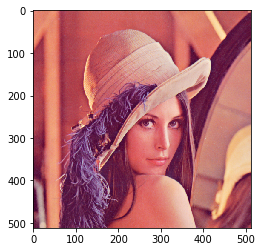

In [0]:
! wget -q https://raw.githubusercontent.com/svenschultze/mediaprocessing-notebooks/master/pictures/Lenna.png
img = cv2.imread("Lenna.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

Now we can see the image. The next step is to find out the size of the image in the x-axis (width of image) and in the y-axis (height of image). That happens with the **shape** function.

In [0]:
img.shape

(512, 512, 3)

Now we can divide the width with 512 and the height with 512 by 3 to calculate the positions for the lines of the **Rule of Thirds**.

In [0]:
third_of_height = img.shape[0] // 3
print(third_of_height)

170


Now we calculated the position of the first line in the height of the image. Because the height of the image is equal to the width we already calculated the line in the width of the image. The second line will be at the position 170.666 + 170.666 = 341.332.

In [0]:
third_of_height_2 = third_of_height * 2 #for the second line
print(third_of_height_2)

340


Now we are able to draw the line into the image with the **cv2.line()** function. Therefore we have to know to points: For 

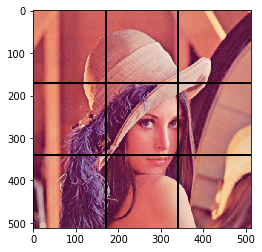

In [0]:
img = cv2.imread("Lenna.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
line_width = 3 # thickness of line has to be greater than 1 because 1 is invisible in some edge cases
black = (0,0,0)
line_color = black
cv2.line(img, (0, third_of_height), (512, third_of_height), line_color,line_width)
cv2.line(img, (third_of_height, 0), (third_of_height, 512), line_color,line_width)
cv2.line(img, (0, third_of_height_2), (512, third_of_height_2), line_color,line_width)
cv2.line(img, (third_of_height_2, 0), (third_of_height_2, 512), line_color,line_width)
plt.imshow(img)

The following function called **draw_rule_of_thirds** is used to draw the lines of the *Rule of Thirds* (RT) on the given photo. The function requireds an object of type *img*, the colour the lines should appear and the line width for the RT-lines. It returns an object of type *img*.

> *Notice, that the colour of the line needs to be given be a tuple, for example, (255, 255, 255) for white line. The line width has to be an integer value bigger 1.* 


In the function the photo will be preprocessed in the sense that it determines the size of the image. Therefore we use the **shape**-function of *open CV*. To calculate the first line for the RT it divides the height (resp. the width) of the photo by 3. Therefore the "//" operator is used since we need integer values for the further processing. For the second horizontal line the height is divided by 3 too but now the result is multiplied by 2. Similarly for the vertical line.

After the preprocessing we have all information to draw the RT-lines. Therefore we use the **line**-function of *open cv*. Since there are four lines needed the function is called four times. The only difference is in the point arguments. Because the combination of start and end point are different in all four cases.

At the end the function returns the photo with the RT-lines on it.


In this specific case he line width has to be 5 otherwise the line will not appear.

In [0]:
def draw_rule_of_thirds(img, line_color, line_width):
  height = img.shape[0]
  width = img.shape[1]

  #calulating the lines for the rule of thirds
  third_of_height_1 = height // 3
  third_of_height_2 = (height // 3) * 2
  third_of_width_1 = width // 3
  third_of_width_2 = (width // 3) * 2
  
  #drawing the lines on the photo calculated above
  #drawing the horizontal lines
  img = cv2.line(img, (0, third_of_height_1), (width, third_of_height_1), line_color, line_width)
  img = cv2.line(img, (0, third_of_height_2), (width, third_of_height_2), line_color, line_width)
  #drawing the vertical lines
  img = cv2.line(img, (third_of_width_1, 0), (third_of_width_1, height), line_color, line_width)
  img = cv2.line(img, (third_of_width_2, 0), (third_of_width_2, height), line_color, line_width)
  return img

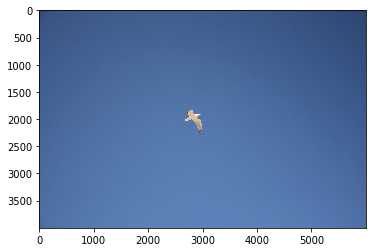

In [7]:
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-make-it-aesthetic/master/Pictures/moewe.JPG
img_seagull = cv2.imread("moewe.JPG")
img_seagull = cv2.cvtColor(img_seagull, cv2.COLOR_BGR2RGB)
plt.imshow(img_seagull)

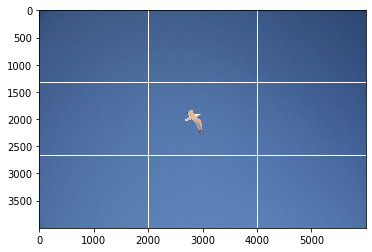

In [8]:
draw_rule_of_thirds(img_seagull, (255,255,255), 17)
plt.imshow(img_seagull)